The OS module in Python is a part of the standard library of the programming language. When imported, it lets the user interact with the native OS Python is currently running on. In simple terms, it provides an easy way for the user to interact with several os functions that come in handy in day to day programming

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="korrapatidhanunjaya"
os.environ['KAGGLE_KEY']="75a49617b770b80d03f9a02656a176dc"

**to download xray datasets file from kaggle we need to provide the url of the dataset link.bold text**

In [ ]:

!kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:13<00:00, 125MB/s]
100% 2.29G/2.29G [00:13<00:00, 180MB/s]


**to unzip or extract the dataset file**  




In [ ]:
!unzip chest-xray-pneumonia.zip 

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

**we use open cv module to read images**
**by importing cv module we can read images**

In [ ]:
import cv2

In [ ]:
img=cv2.imread('/content/chest_xray/train/NORMAL/IM-0117-0001.jpeg')

**we use matplotlib.pyplot module by using pyplot we can make changes to figure e.g.creates a figure,creates a plotting area in figure**





In [ ]:
import matplotlib.pyplot as plt


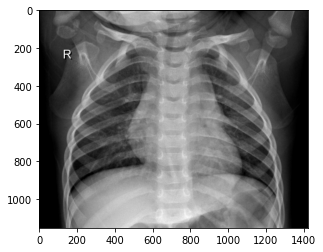

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(1152, 1422, 3)

In [ ]:
img1=cv2.imread('/content/chest_xray/train/NORMAL/IM-0119-0001.jpeg')

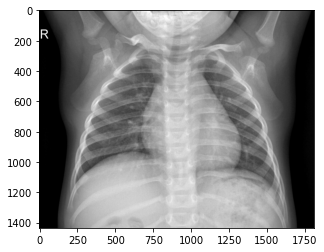

In [ ]:
plt.imshow(img1)

In [ ]:
img1.shape

(1434, 1810, 3)

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/test'

In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [ ]:


# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/chest_xray/train/*')

In [ ]:
len(folders)

2

In [ ]:


# our layers - you can add more if you want
x = Flatten()(vgg.output)



In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:


# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/chest_xray/train',
                                               target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
r = model.fit_generator(
   training_set,
   validation_data=test_set,
   epochs=5,
   steps_per_epoch=len(training_set),
   validation_steps=len(test_set)
)

<ipython-input-26-b33a0da10ad1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
652/652 [==============================] - 2121s 3s/step - loss: 0.1996 - accuracy: 0.9302 - val_loss: 0.2725 - val_accuracy: 0.9327
Epoch 2/5
652/652 [==============================] - 2127s 3s/step - loss: 0.1784 - accuracy: 0.9448 - val_loss: 0.3620 - val_accuracy: 0.9151
Epoch 3/5
652/652 [==============================] - 2110s 3s/step - loss: 0.1709 - accuracy: 0.9561 - val_loss: 0.4039 - val_accuracy: 0.9151
Epoch 4/5
286/652 [============>.................] - ETA: 17:39 - loss: 0.1164 - accuracy: 0.9659

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3